In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split# Load the data
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [74]:
df = pd.read_csv("D:/s/data science/kaggle/archive/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [76]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [77]:
df = df.drop(['Unnamed: 0' , 'key'], axis=1)

In [78]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [79]:
df.dropna(axis=0,inplace=True)

In [80]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [81]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors= 'coerce')

In [82]:
df = df.assign(
    second = df.pickup_datetime.dt.second,
    minute = df.pickup_datetime.dt.minute,
    hour = df.pickup_datetime.dt.hour,
    day = df.pickup_datetime.dt.day,
    month = df.pickup_datetime.dt.month,
    year = df.pickup_datetime.dt.year,
    dayofweek = df.pickup_datetime.dt.dayofweek
)


In [83]:
df = df.drop('pickup_datetime', axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   second             199999 non-null  int64  
 7   minute             199999 non-null  int64  
 8   hour               199999 non-null  int64  
 9   day                199999 non-null  int64  
 10  month              199999 non-null  int64  
 11  year               199999 non-null  int64  
 12  dayofweek          199999 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 21.4 MB


In [85]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3


In [86]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90)|(df.pickup_latitude < -90) | 
    (df.dropoff_latitude > 90) | (df.dropoff_latitude < -180) | 
    (df.pickup_longitude > 180) | (df.pickup_longitude < -180)|
    (df.dropoff_longitude > 90)|(df.dropoff_longitude < -90) 
]

In [87]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [88]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    long1, lati1, long2, lati2 = map(np.radians, [longitude1, latitude1, longitude2, latitude2])
    dist_long = long2 - long1
    dist_lati = lati2 - lati1
    a = np.sin(dist_lati/2)**2 + np.cos(lati1) * np.cos(lati2) * np.sin(dist_long/2)**2 
    c = 2* np.arcsin(np.sqrt(a))* 6371
    return c

In [89]:
df['Distance']= distance_transform(
    df['pickup_longitude'],
    df['pickup_latitude'],
    df['dropoff_longitude'],
    df['pickup_latitude']
)

In [90]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3,0.025712
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4,0.029914
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0,3.578732
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4,0.909878
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3,4.048724


Text(0, 0.5, 'Fare Amount')

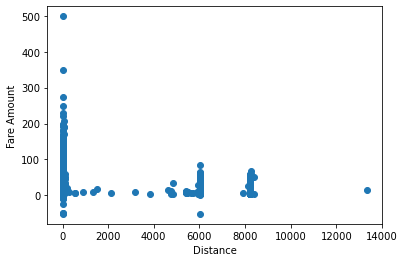

In [91]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare Amount')

<AxesSubplot:>

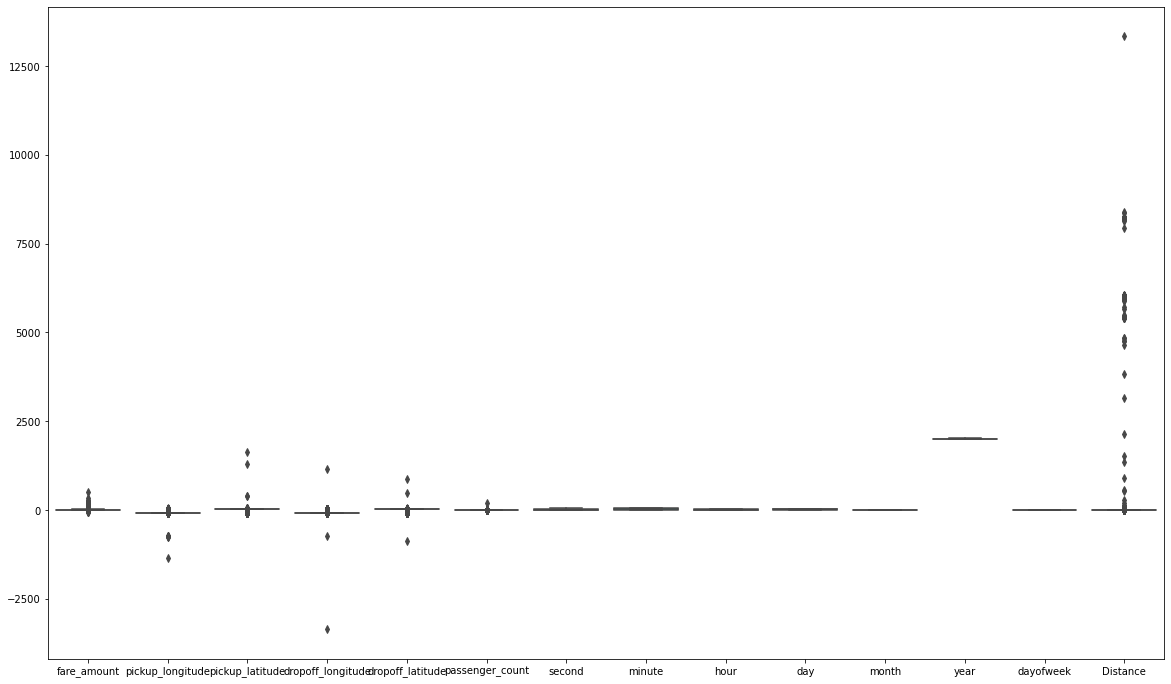

In [92]:
plt.figure(figsize=(20,12))
sns.boxplot(data =df)

In [93]:
df.drop(df[df['Distance'] >= 60].index, inplace=True)
df.drop(df[df['fare_amount'] <=0].index, inplace=True)

df.drop(df[(df['fare_amount'] > 100) & (df['Distance'] < 1)].index,inplace=True)
df.drop(df[(df['fare_amount'] < 100) & (df['Distance'] > 100)].index,inplace=True)

Text(0, 0.5, 'Fare amount')

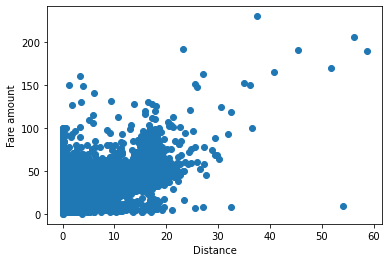

In [94]:
plt.scatter(df['Distance'],df['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare amount')

In [95]:
#Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='BuGn')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,Distance
fare_amount,1.000000,0.005839,-0.006241,0.005455,-0.005996,0.011654,-0.000915,-0.007725,-0.020574,0.000864,0.023923,0.121264,0.006466,0.807594
pickup_longitude,0.005839,1.000000,-0.963336,0.999992,-0.967610,-0.000320,-0.014840,0.002737,0.001670,0.005195,-0.002805,0.005937,0.002882,-0.086252
pickup_latitude,-0.006241,-0.963336,1.000000,-0.963336,0.966778,-0.001307,0.016513,-0.002298,-0.002227,-0.008923,0.003789,-0.008337,-0.004228,0.081890
dropoff_longitude,0.005455,0.999992,-0.963336,1.000000,-0.967609,-0.000320,-0.014802,0.002744,0.001439,0.005202,-0.002796,0.005908,0.002957,-0.086563
dropoff_latitude,-0.005996,-0.967610,0.966778,-0.967609,1.000000,-0.000979,0.016965,-0.002234,-0.001776,-0.008502,0.003548,-0.008343,-0.004328,0.081583
passenger_count,0.011654,-0.000320,-0.001307,-0.000320,-0.000979,1.000000,-0.203057,0.000772,0.013255,0.003120,0.009898,0.004869,0.033326,0.006315
second,-0.000915,-0.014840,0.016513,-0.014802,0.016965,-0.203057,1.000000,0.001847,-0.013432,-0.002067,-0.049770,0.083057,-0.000099,-0.001052
minute,-0.007725,0.002737,-0.002298,0.002744,-0.002234,0.000772,0.001847,1.000000,0.001331,-0.001261,-0.001545,-0.002674,-0.002397,-0.008860
hour,-0.020574,0.001670,-0.002227,0.001439,-0.001776,0.013255,-0.013432,0.001331,1.000000,0.004842,-0.004024,0.002161,-0.086953,-0.032848
day,0.000864,0.005195,-0.008923,0.005202,-0.008502,0.003120,-0.002067,-0.001261,0.004842,1.000000,-0.017309,-0.012050,0.005547,-0.001546


In [96]:
#Standardization

x= df['Distance'].values.reshape(-1,1) #independent var
y= df['fare_amount'].values.reshape(-1,1) #dependent var


In [97]:
from sklearn.preprocessing import StandardScaler

std= StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(x)
print(x_std)

[[-0.39808499]
 [-0.37727007]
 [ 0.16391782]
 ...
 [ 2.03726049]
 [ 0.33043716]
 [ 0.28880733]]
[[-0.65058142]
 [-0.64910757]
 [ 0.59553785]
 ...
 [ 3.09387322]
 [-0.24854043]
 [-0.62670198]]


In [98]:
#splitting dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

In [99]:
# simple linear regression

from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score : {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score : {:.7f}".format(l_reg.score(X_test, y_test)))


Training set score : 0.65
Test set score : 0.6581654


In [100]:
y_pred= l_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']]=y_test
result[['Predicted']] = y_pred

result.sample(10)

,Actual,Predicted
12276,0.070251,0.144365
8053,-0.398085,0.116190
29573,0.486549,0.141109
14716,0.122288,-0.464684
21616,-0.460530,-0.106173
7695,-0.252381,-0.135662
2324,4.787952,3.811838
34237,0.018213,0.129983
10420,-0.627049,-0.321238
591,-0.085861,-0.510873


In [101]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute % Error : ", metrics.mean_absolute_percentage_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Squared (R2): ", np.sqrt(metrics.r2_score(y_test, y_pred)))



Mean Absolute Error :  0.3551621443004977
Mean Absolute % Error :  2.122149289257607
Mean Squared Error :  0.3452804359105348
Root Mean Squared Error :  0.5876056806316076
R Squared (R2):  0.8112739519347922


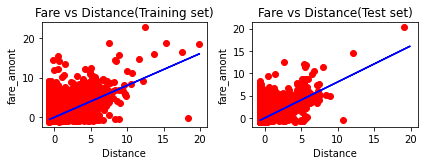

In [102]:
#Visualization

plt.subplot(2,2,1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, l_reg.predict(X_train), color='blue')
plt.title('Fare vs Distance(Training set)')
plt.ylabel('fare_amont')
plt.xlabel('Distance')


plt.subplot(2,2,2)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, l_reg.predict(X_train), color='blue')
plt.title('Fare vs Distance(Test set)')
plt.ylabel('fare_amont')
plt.xlabel('Distance')

plt.tight_layout()
plt.show()



In [104]:
cols=['Model','RMSE','R-squared']

result_tabulation = pd.DataFrame(columns = cols)

linreg_metrics = pd.DataFrame([[    
    "Linear Regression model",
    np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
    np.sqrt(metrics.r2_score(y_test, y_pred))
]], columns=cols)

result_tabulation = pd.concat([result_tabulation,linreg_metrics], ignore_index = True)

result_tabulation

,Model,RMSE,R-squared
0,Linear Regression model,0.587606,0.811274


In [ ]:
#Random Forest Regressor

In [105]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

rf_reg.fit(X_train,y_train)

C:\Users\Ishwari\AppData\Local\Temp/ipykernel_10500/1275080161.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train,y_train)


RandomForestRegressor(random_state=10)

In [106]:
y_pred_RF = rf_reg.predict(X_test)

result = pd.DataFrame()
result[['Actual']] = y_test
result['Predicted'] = y_pred_RF

result.sample(10)

,Actual,Predicted
13609,0.122288,-0.587501
36497,0.538586,1.056878
31259,0.205548,0.537233
3706,-0.398085,-0.435760
3875,2.096583,1.915233
26872,-0.627049,-0.602175
16606,-0.189936,0.033825
11799,-0.502160,1.095281
3594,-0.418900,-0.452412
28115,-0.346048,-0.272436


In [107]:
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred_RF))
print("Mean Absolute % Error : ", metrics.mean_absolute_percentage_error(y_test, y_pred_RF))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred_RF))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))
print("R Squared (R2): ", np.sqrt(metrics.r2_score(y_test, y_pred_RF)))

Mean Absolute Error :  0.41670956230443557
Mean Absolute % Error :  2.8774277261105556
Mean Squared Error :  0.4649917348281475
Root Mean Squared Error :  0.681903024504326
R Squared (R2):  0.7346079443108385


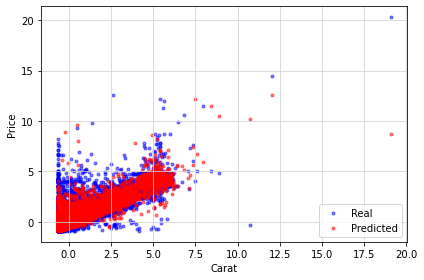

In [109]:
#Visualization

plt.scatter(X_test, y_test, c='b', alpha =0.5, marker= '.', label='Real')
plt.scatter(X_test, y_pred_RF, c='r', alpha=0.5, marker='.', label="Predicted")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3',linestyle='solid')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [111]:
random_forest_metrics = pd.DataFrame([["Random Forest Regression Model", 
                                      np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)),
                                      np.sqrt(metrics.r2_score(y_test, y_pred_RF))]], columns = cols)

result_tabulation = pd.concat([result_tabulation, random_forest_metrics], ignore_index = True)
result_tabulation

,Model,RMSE,R-squared
0,Linear Regression model,0.587606,0.811274
1,Random Forest Regression Model,0.681903,0.734608
